In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as power
from math import sqrt
%matplotlib inline

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.
Here is the data file. And here is the codebook, with information about the variable coding and content.
In this dataset, the same participants answered questions in 2012 and again 2014.
1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
Submit a link to your work below.

In [2]:
#paired_ttest()

In [3]:
df = pd.read_csv('ESSdata_Thinkful.csv')

In [4]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [5]:
def compare_years(df, attr='ppltrst', country='ES'):
    print('\n\n Computing results for {}.'.format(country))
    data = df[df[attr].notnull()]
    data = data[data.cntry==country]
    yr12 = data[data.year==6]
    yr12.index = yr12.idno
    yr14 = data[data.year==7]
    yr14.index = yr14.idno
    
    #Ensure that all samples occur in both years
    for ind in yr12.index:
        if ind not in yr14.index:
            #print('rejecting idno: ', ind)
            yr12.drop([ind], inplace=True)
    for ind in yr14.index:
        if ind not in yr12.index:
            #print('rejecting idno: ', ind)
            yr14.drop([ind], inplace=True)
            
    yr12[attr].hist(alpha=.5, label='2012')
    yr14[attr].hist(alpha=.5, label='2014')
    plt.legend();
    plt.title('{} response distribution for {}'.format(attr, country));
    plt.show();
    
    
    ttest_res = stats.ttest_rel(yr14[attr], yr12[attr])
    print('T-test result: test statistic = {}, p-value = {}.'.format(
        str(ttest_res[0])[:5], 
        (str(ttest_res[1])[:3]) + str(ttest_res[1])[-4:])
         )
    alpha = ttest_res[1]
    pooled_SD = sqrt((yr12[attr].std()+yr14[attr].std())/2)
    effect_size = abs(yr12[attr].mean() - yr14[attr].mean()) / pooled_SD
    stat_power = power.tt_solve_power(
        effect_size=effect_size, 
        nobs=len(yr12),
        alpha=alpha, 
        power=None, 
        alternative='two-sided'
    )
    print('statistical power: ', str(stat_power)[:5])
    krusk = stats.kruskal(yr12[attr], yr14[attr])
    print('Kruskal-Wallis test result: test statistic = {}, p-value = {}'.format(
        str(krusk[0])[:5], 
        (str(krusk[1])[:4] + str(str(krusk[1])[-4:]))
         ))
    print('mean 2012: ', str(yr12[attr].mean())[:5], 
          'median 2012: ', yr12[attr].median())
    print('mean 2014: ', str(yr14[attr].mean())[:5],
         'median 2014: ', yr14[attr].median())
    
    return df



 Computing results for CH.


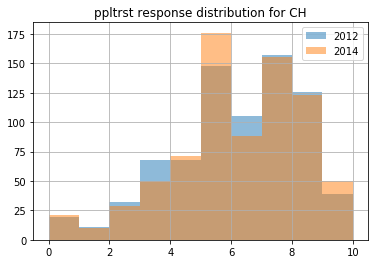

T-test result: test statistic = 0.658, p-value = 0.55113.
statistical power:  0.791
Kruskal-Wallis test result: test statistic = 0.301, p-value = 0.581144
mean 2012:  5.677 median 2012:  6.0
mean 2014:  5.751 median 2014:  6.0


 Computing results for CZ.


/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


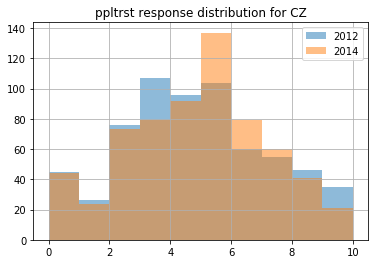

T-test result: test statistic = 0.500, p-value = 0.66824.
statistical power:  0.785
Kruskal-Wallis test result: test statistic = 0.843, p-value = 0.353871
mean 2012:  4.361 median 2012:  4.0
mean 2014:  4.429 median 2014:  5.0


 Computing results for DE.


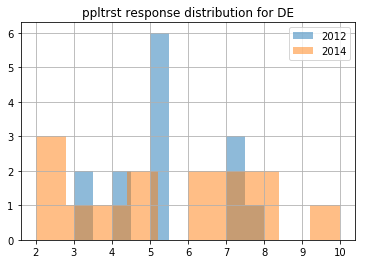

T-test result: test statistic = 0.183, p-value = 0.87971.
statistical power:  0.866
Kruskal-Wallis test result: test statistic = 0.034, p-value = 0.859125
mean 2012:  5.214 median 2012:  5.0
mean 2014:  5.357 median 2014:  5.5


 Computing results for ES.


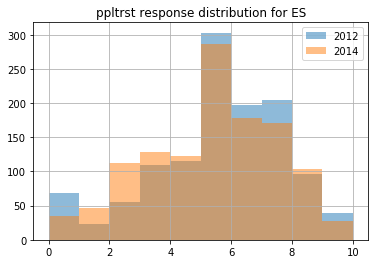

T-test result: test statistic = -2.45, p-value = 0.07253.
statistical power:  0.996
Kruskal-Wallis test result: test statistic = 8.033, p-value = 0.009558
mean 2012:  5.112 median 2012:  5.0
mean 2014:  4.895 median 2014:  5.0


 Computing results for NO.


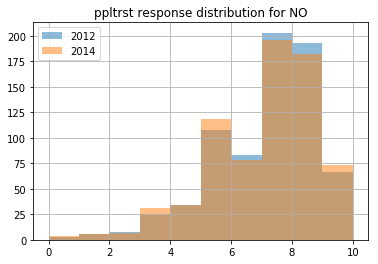

T-test result: test statistic = -0.50, p-value = 0.60152.
statistical power:  0.748
Kruskal-Wallis test result: test statistic = 0.204, p-value = 0.659158
mean 2012:  6.647 median 2012:  7.0
mean 2014:  6.599 median 2014:  7.0


 Computing results for SE.


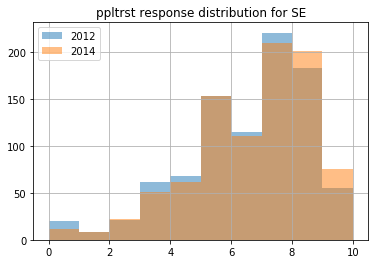

T-test result: test statistic = 2.067, p-value = 0.07096.
statistical power:  0.983
Kruskal-Wallis test result: test statistic = 4.214, p-value = 0.046436
mean 2012:  6.058 median 2012:  7.0
mean 2014:  6.257 median 2014:  7.0


In [6]:
countries = list(df.cntry.unique())
for country in countries:
    df = compare_years(df, country = country)

The only p <. 05 results are spain (ES) and Sweden (SE). We see the mean value in Spain decreased slightly from 5.1 in 2012 to 4.9 in 2014, where in Sweden it increased from 6.05 to 6.25. Both of these changes in mean responses come with a p < .05 and statistical power value > .95, which suggests a very low probability of erroneously rejecting $ H_0 $: that the survey year (2012 vs 2014) has no effect on mean response for these countries. The negative test statistic for Spain suggests an alternative hypothesis that explains an increase in mean response in 2014 compared to 2012 may be formulated. The opposite effect (a negative test statistic) suggests an alternative hypothesis explaining the opposite change in mean response value in Spain may be formulated.

## Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.



 Computing results for CH.


/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


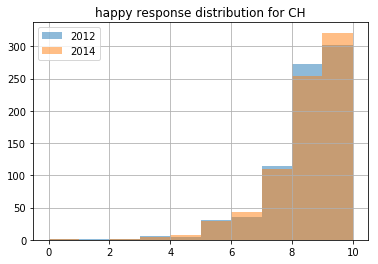

T-test result: test statistic = 0.319, p-value = 0.75543.
statistical power:  0.782
Kruskal-Wallis test result: test statistic = 0.155, p-value = 0.694052
mean 2012:  8.088 median 2012:  8.0
mean 2014:  8.111 median 2014:  8.0


 Computing results for CZ.


/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


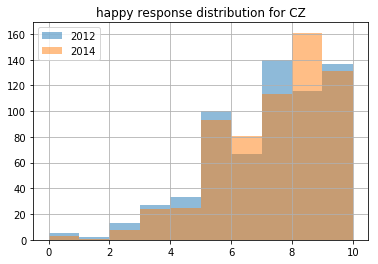

T-test result: test statistic = 1.456, p-value = 0.14339.
statistical power:  0.928
Kruskal-Wallis test result: test statistic = 1.854, p-value = 0.172592
mean 2012:  6.767 median 2012:  7.0
mean 2014:  6.929 median 2014:  7.0


 Computing results for DE.


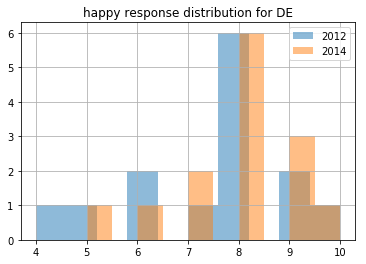

T-test result: test statistic = 0.806, p-value = 0.40773.
statistical power:  0.718
Kruskal-Wallis test result: test statistic = 0.390, p-value = 0.535059
mean 2012:  7.428 median 2012:  8.0
mean 2014:  7.857 median 2014:  8.0


 Computing results for ES.


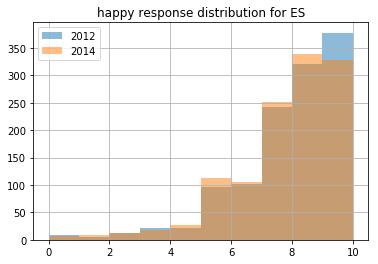

T-test result: test statistic = -1.61, p-value = 0.15565.
statistical power:  0.945
Kruskal-Wallis test result: test statistic = 3.962, p-value = 0.042581
mean 2012:  7.547 median 2012:  8.0
mean 2014:  7.420 median 2014:  8.0


 Computing results for NO.


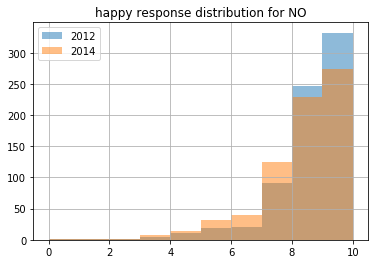

T-test result: test statistic = -4.28, p-value = 2.0e-05.
statistical power:  0.999
Kruskal-Wallis test result: test statistic = 19.51, p-value = 9.97e-06
mean 2012:  8.251 median 2012:  8.0
mean 2014:  7.911 median 2014:  8.0


 Computing results for SE.


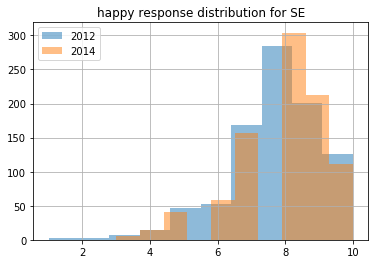

T-test result: test statistic = 0.558, p-value = 0.59123.
statistical power:  0.721
Kruskal-Wallis test result: test statistic = 0.039, p-value = 0.844547
mean 2012:  7.909 median 2012:  8.0
mean 2014:  7.948 median 2014:  8.0


In [7]:
for country in countries:
    df = compare_years(df, country = country, attr = 'happy')

The only response with highly significant differences between the two years in Norway (NO), whose mean response decreased from 8.25 in 2012 to 7.9 in 2014. This change in mean comes with a small p value and a high statistical power, suggesting a very high likelihood for correctly rejecting $ H_0 $: that there is no effect between 2012 and 2014 on the response distribution. The negative test statistic suggests that an alternative hypotheses to explain the decrease in mean response in 2014 compared to 2012 could be tested.

## Question 3: Who reported watching more TV in 2012, men or women?

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


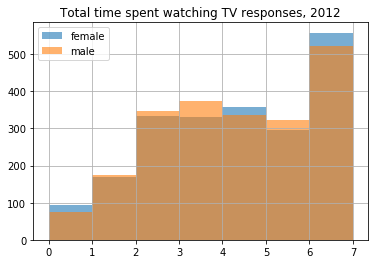

T-test result: test statistic = 0.689, p-value = 0.44027.
statistical power:  0.776162132091
Kruskal-Wallis test result: test statistic = 0.576, p-value = 0.42501
mean female response:  3.94439252336 median female response:  4.0
mean male response:  3.90190609019 median male response:  4.0


In [8]:
#Get all 2012 responses w/ tvtot
data12 = df[df.year==6][df.tvtot.notnull()]

#assign into male/female groups
f12 = data12[data12.gndr==2]
m12 = data12[data12.gndr==1]

f12.tvtot.hist(alpha=.6, label='female', bins=7)
m12.tvtot.hist(alpha=.6, label='male', bins=7)
plt.title('Total time spent watching TV responses, 2012')
plt.legend();
plt.show();

ttest_res = stats.ttest_ind(f12.tvtot, m12.tvtot)
print('T-test result: test statistic = {}, p-value = {}.'.format(
    str(ttest_res[0])[:5], 
    (str(ttest_res[1])[:3]) + str(ttest_res[1])[-4:])
     )
alpha = ttest_res[1]
pooled_SD = sqrt((f12.tvtot.std()+m12.tvtot.std())/2)
effect_size = abs(f12.tvtot.mean() - m12.tvtot.mean()) / pooled_SD
print(
    'statistical power: ', 
    power.tt_solve_power(
        effect_size=effect_size, 
        nobs=len(m12), 
        alpha=alpha, 
        power=None, 
        alternative='two-sided'
      )
)
krusk = stats.kruskal(f12.tvtot, m12.tvtot)
print(
    'Kruskal-Wallis test result: test statistic = {}, p-value = {}'.format(
        str(krusk[0])[:5], 
        (str(krusk[1])[:3] + str(str(krusk[1])[-4:]))
     )
)
print('mean female response: ', f12.tvtot.mean(), 
      'median female response: ', f12.tvtot.median())
print('mean male response: ', m12.tvtot.mean(),
     'median male response: ', m12.tvtot.median())

Neither a t-test nor the Kruskal-Wallis test detect a statistically significant difference between the two groups, and a visual inspection of the response distributions between the male and female groups seems to agree: there's no visible difference between the two distributions. We can cannot reject $ H_0 $, that sex has no impact on time spent watching TV responses.

## Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


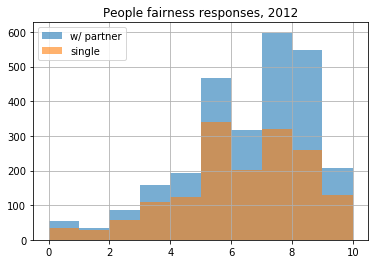

T-test result: test statistic = 3.320, p-value = 0.00988.
statistical power:  0.997493885062
Kruskal-Wallis test result: test statistic = 13.73, p-value = 0.09644
mean single response:  5.85696517413 median single response:  6.0
mean partnered response:  6.08073601202 median partnered response:  7.0


In [9]:
#Get all 2012 responses w/ fairness response
data12 = df[df.year==6][df.pplfair.notnull()]

#assign into single/partner groups
p12 = data12[data12.partner==1]
s12 = data12[data12.partner==2]

p12.pplfair.hist(alpha=.6, label='w/ partner', bins=10)
s12.pplfair.hist(alpha=.6, label='single', bins=10)
plt.title('People fairness responses, 2012')
plt.legend();
plt.show();

ttest_res = stats.ttest_ind(p12.pplfair, s12.pplfair)
print('T-test result: test statistic = {}, p-value = {}.'.format(
    str(ttest_res[0])[:5], 
    (str(ttest_res[1])[:3]) + str(ttest_res[1])[-4:])
     )
alpha = ttest_res[1]
pooled_SD = sqrt((p12.pplfair.std()+s12.pplfair.std())/2)
effect_size = abs(p12.pplfair.mean() - s12.pplfair.mean()) / pooled_SD
print('statistical power: ', power.tt_solve_power(effect_size=effect_size, nobs=len(s12), alpha=alpha, power=None, alternative='two-sided'))

krusk = stats.kruskal(p12.pplfair, s12.pplfair)
print(
    'Kruskal-Wallis test result: test statistic = {}, p-value = {}'.format(
        str(krusk[0])[:5], 
        (str(krusk[1])[:3] + str(str(krusk[1])[-4:]))
     )
)
print('mean single response: ', s12.pplfair.mean(), 
      'median single response: ', s12.pplfair.median())
print('mean partnered response: ', p12.pplfair.mean(),
     'median partnered response: ', p12.pplfair.median()) 

These numbers come from responses to the question, "do you think that most people would try to take advantage of you if they got the chance, or would they try to be fair? (1-10)," divided by whether the respondent lives alone or with a partner. Both the t-test and Kruskal-Wallis test results give us a high probability of correctly rejecting $ H_0 $: that living alone or living with a partner has no effect on response to the question. The positive t-test statistic informs us that an alternative hypothesis to explain why the expected response for partnered individuals is higher than that of single individuals should be explored.

## Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

I want to pick the countries with the most avialable samples for more play. Let's see.

In [10]:
#These functions will run anova tests on the various groups and plot their distributions.

def plot_groups(df, groups, attr='sclmeet', highlighted=None, bins=None):
    for group in groups:
        if group == highlighted:
            alpha = .7
        else:
            alpha = .1
        if not bins:
            bins = len(df[df.cntry==group][attr].unique())
        df[df.cntry==group][attr].hist(alpha=alpha, label=group, bins=bins, normed=True)
    plt.title('Response Distribution for {}'.format(highlighted))
    plt.legend();
    plt.show();
    return None

def anova_groups(df, groups, attr='sclmeet', bins=None):
    lists = []
    for group in groups:
        lists.append(df[df.cntry == group][attr])
        #return
    print('\n')
    print('Including all groups:')
    print(stats.f_oneway(*lists))
    print(stats.kruskal(*lists))
    for i, group in enumerate(groups):
        print('\nexcluding group: ', group)
        new_list = lists[:i] + lists[(i+1):]
        print(stats.f_oneway(*new_list))
        print(stats.kruskal(*new_list))
        print('\nThe mean value for {} is: '.format(group), lists[i].mean())
        print('The median value for {} is: '.format(group), lists[i].median())
        plot_groups(df, attr=attr, groups=groups, highlighted=group, bins=bins)
    return None

In [11]:
data14 = df[df.year==7][df.sclmeet.notnull()]
data14.cntry.value_counts()

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


ES    1211
SE     908
CH     772
NO     731
CZ     655
DE      14
Name: cntry, dtype: int64

Based on these results and my criteria, it looks like Spain (ES), Sweden (SE), Switzerland (CH), and Norway (NO) are the best four to choose from.



Including all groups:
F_onewayResult(statistic=5.3617236593518438, pvalue=0.001106621438920195)
KruskalResult(statistic=21.186241353532942, pvalue=9.6304263259085977e-05)

excluding group:  ES
F_onewayResult(statistic=8.1348205491906338, pvalue=0.00030128247695001382)
KruskalResult(statistic=21.708596810002788, pvalue=1.9321378032271685e-05)

The mean value for ES is:  5.26011560694
The median value for ES is:  6.0


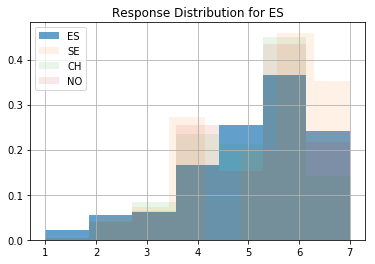


excluding group:  SE
F_onewayResult(statistic=2.1071395397327897, pvalue=0.12178434658137968)
KruskalResult(statistic=7.7293619444946691, pvalue=0.020969611257989122)

The mean value for SE is:  5.42621145374
The median value for SE is:  6.0


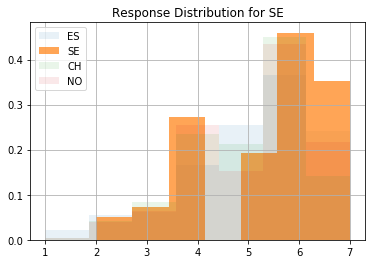


excluding group:  CH
F_onewayResult(statistic=3.726110434690217, pvalue=0.024203881861066479)
KruskalResult(statistic=6.9040385192298057, pvalue=0.031681598373018129)

The mean value for CH is:  5.16062176166
The median value for CH is:  6.0


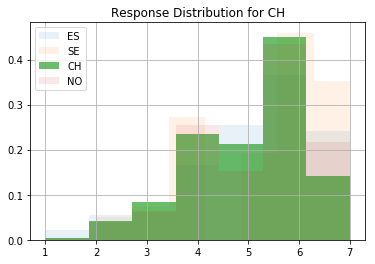


excluding group:  NO
F_onewayResult(statistic=7.8889073426891416, pvalue=0.00038301513884460325)
KruskalResult(statistic=20.974963481937596, pvalue=2.7883324361335602e-05)

The mean value for NO is:  5.3023255814
The median value for NO is:  6.0


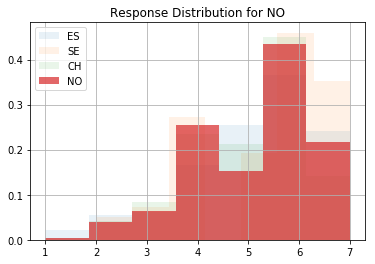

In [12]:
sel_countries = ['ES', 'SE', 'CH', 'NO']
anova_groups(data14, sel_countries)

The ANOVA test statistic on all four groups are significant, suggesting that we can reject $ H_0 $: that the four groups share the same expected response. I then remove each country and run the test again with the remaining groups, and perform the same procedure for each. When I remove Sweden (SE) from the test, it comes back with insufficient statistics to reject the $ H_0 $ that all the countries excluding Sweden share the same expected response. This supports an alternative hypothesis that could explain the higher mean response for Sweden to this question. 

## Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out? Submit a link to your work below.

In [13]:
# I'll pick the same set of countries as before for the same reason: big samples.
data14 = df[df.year==7][df.sclact.notnull()]
data14.cntry.value_counts()

/home/alliedtoasters/anaconda3/envs/dspy3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


ES    1185
SE     904
CH     765
NO     731
CZ     650
DE      14
Name: cntry, dtype: int64



Including all groups:
F_onewayResult(statistic=18.410519979585832, pvalue=7.5097566917638598e-12)
KruskalResult(statistic=51.435463080120996, pvalue=3.9510495801311239e-11)

excluding group:  ES
F_onewayResult(statistic=2.8234984652683965, pvalue=0.059595345967483747)
KruskalResult(statistic=6.3214946094070363, pvalue=0.042394047968332529)

The mean value for ES is:  2.61687763713
The median value for ES is:  3.0


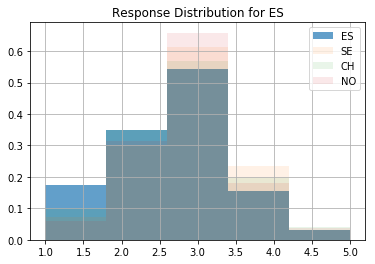


excluding group:  SE
F_onewayResult(statistic=17.766936663853802, pvalue=2.1610294630462006e-08)
KruskalResult(statistic=32.257784427155265, pvalue=9.8926151107621638e-08)

The mean value for SE is:  2.87942477876
The median value for SE is:  3.0


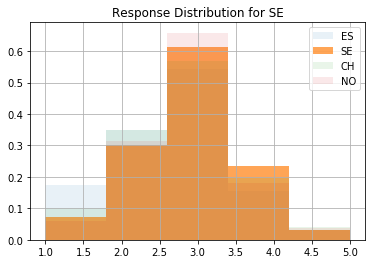


excluding group:  CH
F_onewayResult(statistic=27.753885475253163, pvalue=1.1583945951240228e-12)
KruskalResult(statistic=51.561223215912122, pvalue=6.3624244527333473e-12)

The mean value for CH is:  2.78169934641
The median value for CH is:  3.0


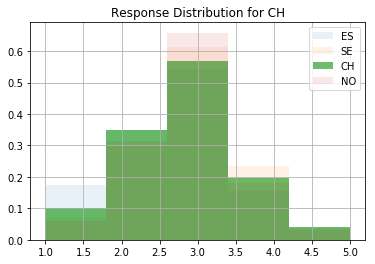


excluding group:  NO
F_onewayResult(statistic=22.028167439547563, pvalue=3.2096123170558474e-10)
KruskalResult(statistic=42.356275472703338, pvalue=6.3452924631604728e-10)

The mean value for NO is:  2.85909712722
The median value for NO is:  3.0


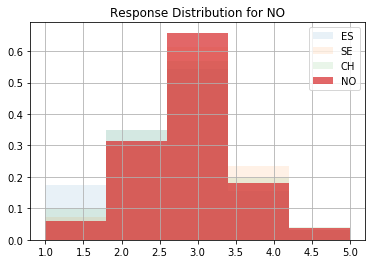

In [14]:
anova_groups(data14, sel_countries, attr='sclact', bins=5)

Using the same method as in question 5, I run the ANOVA test on all four groups to a significant result, giving a high confidence for rejecting the $ H_0 $ that the expected response from all of the countries is the same. Then, I remove each country and run the test on the remaining. The result when removing Spain (ES) from the mix is that the remaining countries do no exhibit sufficiently different responses to reject $ H_0 $ that the expected response from each country is the same. This suggests testing an alternative hypothesis to explain why Spain's expected response to this question has a lower mean than the other countries.